#Pertemuan 3
# Data Preprocessing

## Instal dan pemanggilan library

In [2]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

## Membaca dataset

In [59]:
df =pd.read_csv('train.csv');
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Cleaning

### Menghilangkan nilai null

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


- Mengisi nilai Null dengan strategi Mean

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].mean(), inplace = True) # Strategi Mean

- Menghapus kolom yang banyak nilai null

In [8]:
# df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mod[0], inplace = True) # Strategi Modus
df = df.drop(['Cabin'], axis=1)

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,None,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,None,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,None,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,None,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,None,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,None,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,None,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,None,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,None,0,0,111369,30.0000,C


### Menghilangkan nilai duplikat

In [32]:
df2 = pd.read_csv('income_evaluation.csv')
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
duplicate = df2.duplicated().sum()
print("jumlah data yang duplikat = ", duplicate)

jumlah data yang duplikat =  24


In [30]:
df2.drop_duplicates(inplace=True)
print("jumlah data yang duplikat = ", df2.duplicated().sum())

jumlah data yang duplikat =  0


### menghandle outlier

- Metoe IQR

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#sebelum handling oulier
fig, axes = plt.subplots(1,2, figsize=(5,3))
plt.tight_layout()
sns.boxplot(df2['age'],orient='v',ax=axes[0])
axes[0].title.set_text("Sebelum")
# Menangani outlier dengan IQR
Q1 = df2['age'].quantile(0.25)
Q3 = df2['age'].quantile(0.75)
IQR = df2['age'].apply(stats.iqr)
#ambil nilai antara 1.5*IQR dari Q1 dan Q3 aja
df2['age'] = df2['age'][~((df2['age'] < (Q1 - 1.5 * IQR)) |
(df2['age'] > (Q3 + 1.5 * IQR)))]
#setelah handling oulier
sns.boxplot(df2['age'],orient='v',ax=axes[1])
axes[1].title.set_text("Sesudah")
plt.show()

- Metode Z Score

ValueError: List of boxplot statistics and `positions` values must have same the length

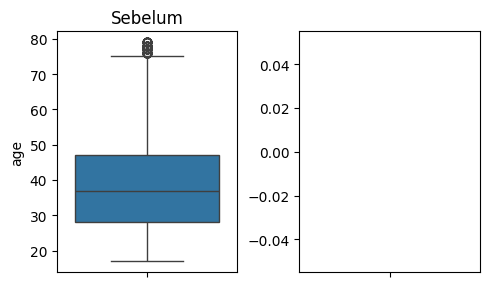

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#sebelum handling oulier
fig, axes = plt.subplots(1,2, figsize=(5,3))
plt.tight_layout()
sns.boxplot(df2['age'],orient='v',ax=axes[0])
axes[0].title.set_text("Sebelum")
# Menghitung Z-Score
df2['age'] = df2['age'][(np.abs(stats.zscore(df2['age'])) <3)]
#setelah handling oulier
sns.boxplot(df2['age'],orient='v',ax=axes[1])
axes[1].title.set_text("Sesudah")
plt.show()

### Data transformation

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          0 non-null      object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [42]:
df3 = pd.read_csv('Iris.csv')
df3

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [52]:
from sklearn.preprocessing import StandardScaler
columns_to_standardize = ['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm', 'PetalLengthCm']
scaler = StandardScaler()
df3[columns_to_standardize] = scaler.fit_transform(df3[columns_to_standardize])
df3

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
...,...,...,...,...,...,...
145,146,1.038005,-0.124958,0.819624,1.447956,Iris-virginica
146,147,0.553333,-1.281972,0.705893,0.922064,Iris-virginica
147,148,0.795669,-0.124958,0.819624,1.053537,Iris-virginica
148,149,0.432165,0.800654,0.933356,1.447956,Iris-virginica


In [53]:
from sklearn.preprocessing import MinMaxScaler
columns_to_standardize = ['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm', 'PetalLengthCm']
scaler = MinMaxScaler()
df3[columns_to_standardize] = scaler.fit_transform(df3[columns_to_standardize])
df3

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...,...
145,146,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,147,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,148,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,149,0.527778,0.583333,0.745763,0.916667,Iris-virginica


### Data transformation

In [54]:
from sklearn.preprocessing import OrdinalEncoder

In [55]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,None,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,None,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,None,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,None,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,None,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,None,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,None,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,None,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,None,0,0,111369,30.0000,C


In [56]:
encoder = OrdinalEncoder()
df["Sex"] = encoder.fit_transform(df[["Sex"]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,None,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,None,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,None,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,None,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1.0,None,0,0,373450,8.0500,S


In [57]:
enc = pd.get_dummies(df[["Embarked"]])
df = df.join(enc)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1.0,None,1,0,A/5 21171,7.2500,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,None,1,0,PC 17599,71.2833,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0.0,None,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,None,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1.0,None,0,0,373450,8.0500,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,None,0,0,211536,13.0000,S,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,None,0,0,112053,30.0000,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,None,1,2,W./C. 6607,23.4500,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1.0,None,0,0,111369,30.0000,C,True,False,False


In [61]:
# Membuat kategori berdasarkan umur
# batas umur
bins = [0, 12, 18, 35, 60, 80]
# nama kategori
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
# Lihat hasilnya
df[['Age', 'Age_Group']].head()

,Age,Age_Group
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


### Data splitting

In [62]:
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [74]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

In [76]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [77]:
#Melihat Dimensi Data X, y Train dan Test
print('Dimensi X train: ', X_train.shape)
print('Dimensi X test: ', X_test.shape)
print('Dimensi y train: ', y_train.shape)
print('Dimensi y test: ', y_test.shape)

Dimensi X train:  (26048, 14)
Dimensi X test:  (26048,)
Dimensi y train:  (6513, 14)
Dimensi y test:  (6513,)
